## **Day 09 of 30 days Data Analysis**

### ***Advanced feature exploration and encoding***

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [5]:
df = pd.read_csv ("C:\\Users\\LENOVO\\Documents\\Programming\\30days_data_analysis\\week02_sql\\supermarket_clean_d08.csv")

### ***Indentify cetegorical and numeric columns:*** 

In [6]:
df.select_dtypes (include = "object").columns
df.select_dtypes (include = ["int64", "float64"]).columns

Index(['Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Time', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

### ***Categorical Analysis:***

In [7]:
df["Gender"].value_counts()
df["Payment"].value_counts(normalize = True) * 100

Payment
Ewallet        34.5
Cash           34.4
Credit card    31.1
Name: proportion, dtype: float64

<Axes: xlabel='Payment', ylabel='count'>

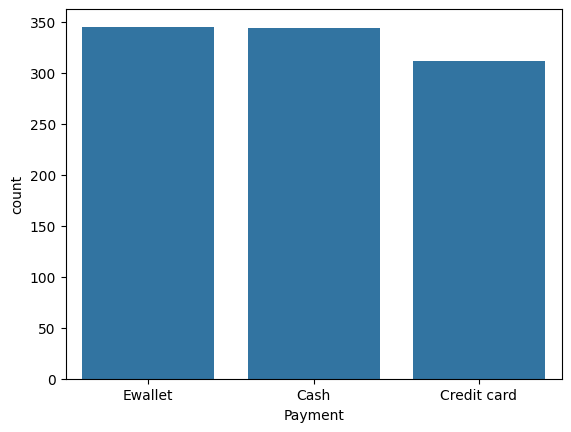

In [8]:
sns.countplot(data = df, x = "Payment")

### ***Batch Data Encoding:***

In [9]:
le = LabelEncoder()
df["Customer type"] = le.fit_transform(df["Customer type"])
df = pd.get_dummies(df, columns= ["Payment", "City"], drop_first= True)

### ***Correlation of Features:***

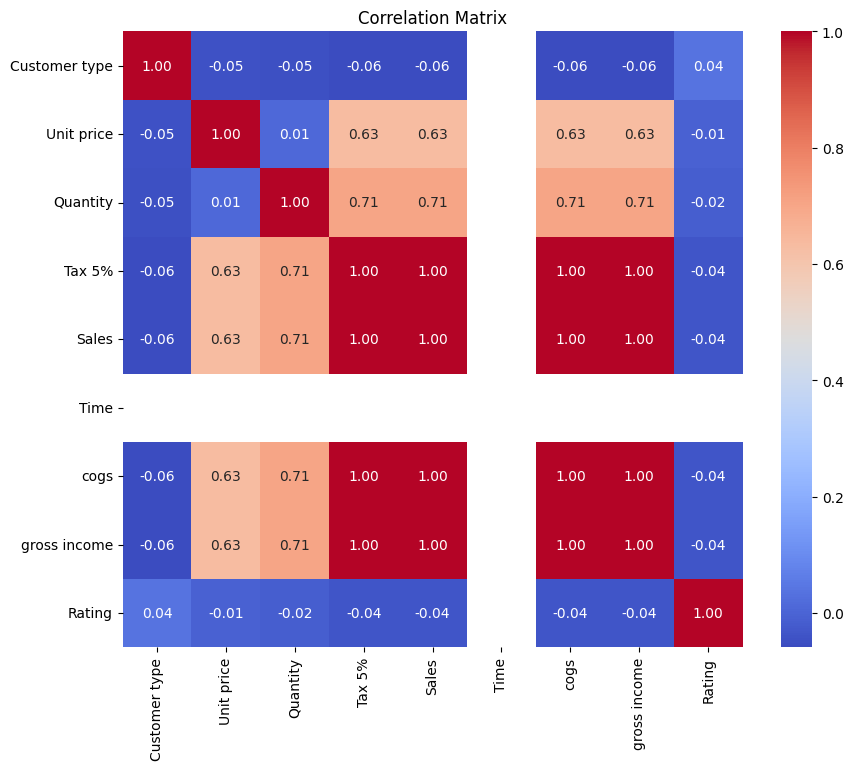

In [10]:
df= df.drop(columns= ["gross margin percentage"])
corr_matrix = df.select_dtypes(include = ["int64", "float64"]).corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

### ***Multivariate Analysis:***

<Axes: xlabel='Gender', ylabel='Sales'>

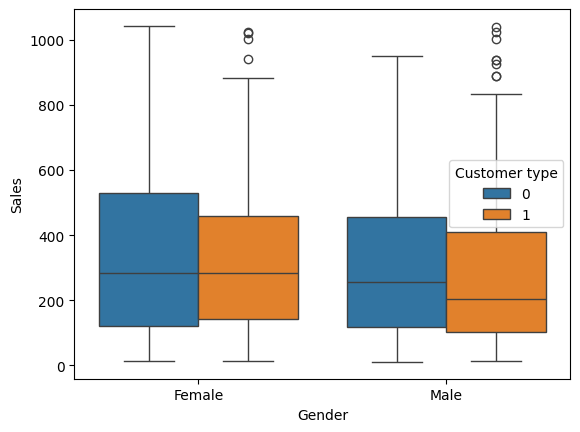

In [11]:
# Boxplot:
sns.boxplot(data = df, x = "Gender", y = "Sales", hue = "Customer type")

<Axes: xlabel='Unit price', ylabel='Quantity'>

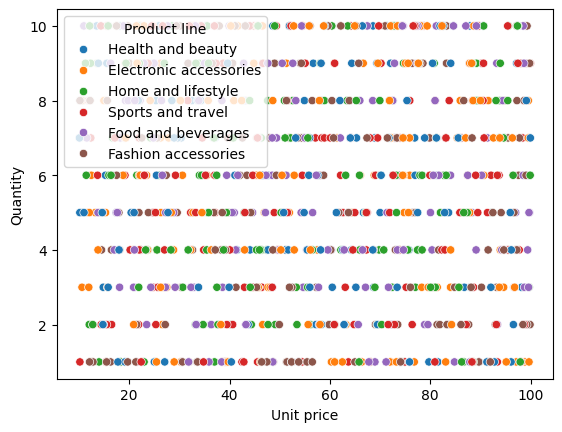

In [12]:
# Scatterplot
sns.scatterplot(data = df, x = "Unit price", y = "Quantity", hue = "Product line")

### ***Save The Final Version:***

In [13]:
df.to_csv("supermarket_cleaned_encoded_d09.csv", index = False)

### ***Summary and Insights:***

***Categorical vs Numerical Features***

*- **Categorical:** Branch, City, Customer type, Gender, Product line, Date, Time, Payment*

*- **Numerical:** Unit price, Quantity, Tax 5%, Sales, cogs, gross margin percentage, gross income, Rating*

***Data Encoding***

*- `Customer type` was converted using Label Encoding.*

*- One-Hot Encoding was applied to `Payment` and `City` to prepare them for correlation analysis.*

***Correlation Analysis***

*- The strongest positive correlation is between `Sales` and `cogs` (0.99), which is expected because cogs directly influences sales.*

*- `gross income` also has a perfect correlation with `Tax 5%` since tax is a fixed percentage of sales.*

*- Ratings show weak correlation with most numerical features, indicating customer satisfaction scores are not strongly tied to sales or pricing.*

***Boxplot Analysis***

*- Boxplots reveal significant outliers in `Sales` and `gross income`, suggesting occasional very high-value transactions.*

*- Most product lines show similar median sales, but variability is higher in some categories.*

***Scatterplot Observations***

*- `Unit price` vs `Quantity` does not display a strong linear relationship, suggesting pricing strategy might not directly impact purchase quantity.*

*- Product lines form small clusters in scatterplots, which might be useful for segmentation.*

***Next Steps***

*- Investigate the high-value outliers to determine if they represent special promotions or errors.*

*- Explore time-based patterns by extracting new features from `Date` and `Time`.*

*- Prepare data scaling for machine learning models.*